In [1]:
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing all necessary packages and files
import argparse
from ConfigParser import SafeConfigParser
import os
from numpy import *
from IPython.display import Image

#image generator is used to simulate an image to sample
import image_generator.image_generator as ig

#multimodal nested sampling and self organizing map is used to sample the simulated image.
import model_nest_som.model_nest_som as ns

#finding clusters in sampled data
import post_sampling.post_sampling as ps

import timeit

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [5]:
#set the prefix for the run
prefix = 0


In [6]:
#accessing the configuration file
parser = SafeConfigParser()
parser.read("config.ini")

output_dir = parser.get("Misc", "location") + "/" + str(prefix)
os.system('mkdir -p ' + output_dir)

0

In [7]:
#change prefix and write
parser.set("Misc","prefix",str(prefix))

#setting plot to false to displable plotting after every 500 iteration
parser.set("Output", "plot","False")
fileout = "files"+"/"+str(prefix)+"/"+'config'+'_'+str(prefix)+'.ini'
F = open(fileout,'w')
parser.write(F)
F.close()

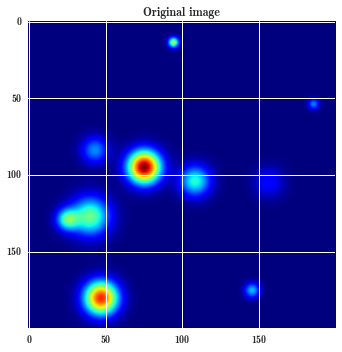

In [8]:
#simulating a 200*200 pixel image
start1 = timeit.default_timer()
ig.run(fileout)
data = load("files/" + str(prefix) + "/" + str(prefix) + "_clean.npy")
plt.title('Original image')
plt.imshow(data,cmap="jet");
stop1 = timeit.default_timer()

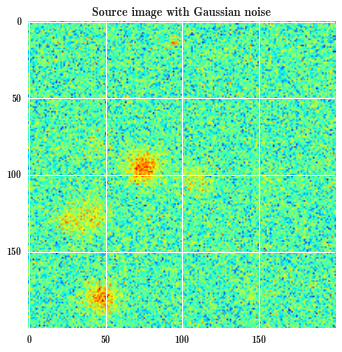

In [12]:
data = load("files/" + str(prefix) + "/" + str(prefix) + "_noised.npy")
plt.title('Original image')
plt.imshow(data,cmap="jet");
plt.title('Source image with Gaussian noise')
stop1 = timeit.default_timer()

In [9]:
#sampling the image using multimodal nested sampling and self-organizing map 
#self organizing map is used to better inform the sampler the location to sample in by identifying areas of 
#higher likelihood and increasing the probability of the samplerto cover those regions.

start2 = timeit.default_timer()
ns.run(fileout)
stop2 = timeit.default_timer()

done with active
79440 Log evaluations
wrote to file: files/0/0_processed_detected.txt
wrote to file: files/0/0_all_detected.txt


TP:  7 FP:  4 Undetected:  3


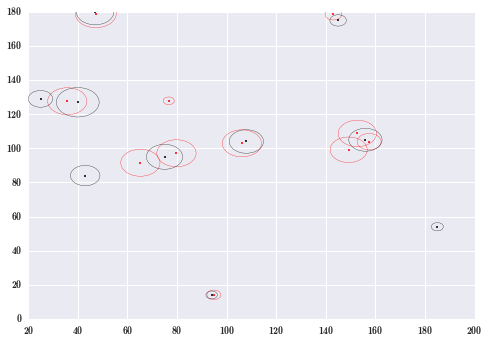

In [10]:
#working with the sampled data to fetch objects
#clustering methods are used to identify sources of high likehood.
start3 = timeit.default_timer()
ps.run(fileout)
stop3 = timeit.default_timer()

In [11]:
#calculating the overall time taken
print "Time taken", (stop1 - start1) + (stop2 - start2) + (stop3 - start3), 'seconds'

Time taken 321.589010239 seconds


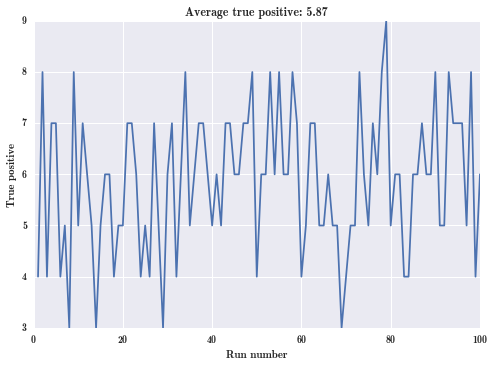

In [16]:
#running the sampling and post sampling methods for 100 iterations to get true positive
#num of active points: 5000
data = loadtxt("files/stats_5000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,0])
plt.xlabel('Run number')
plt.ylabel('True positive')
plt.title('Average true positive: ' + str(mean(data[:,0])))
plt.legend()
plt.show()

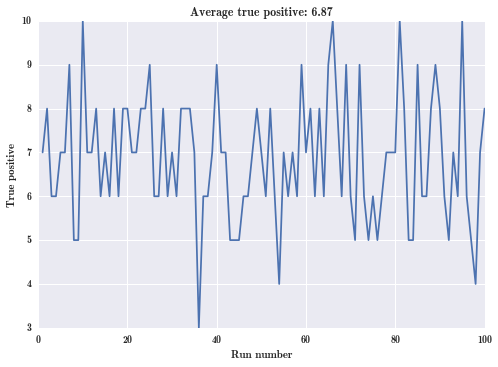

In [17]:
#running the sampling and post sampling methods for 100 iterations to get true positive
#num of active points: 10000
data = loadtxt("files/stats_10000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,0])
plt.xlabel('Run number')
plt.ylabel('True positive')
plt.title('Average true positive: ' + str(mean(data[:,0])))
plt.legend()
plt.show()

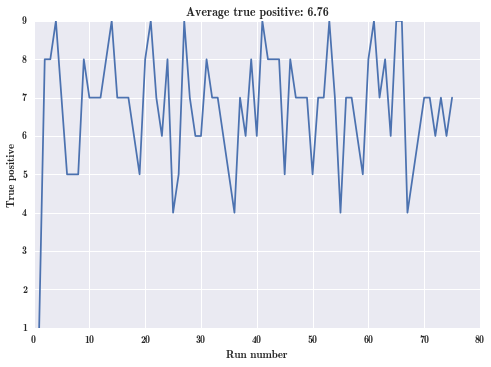

In [18]:
#running the sampling and post sampling methods for 100 iterations to get true positive
#num of active points: 15000
data = loadtxt("files/stats_15000.txt")
i = linspace(1, 75, 75)
plt.plot(i, data[:,0])
plt.xlabel('Run number')
plt.ylabel('True positive')
plt.title('Average true positive: ' + str(mean(data[:,0])))
plt.legend()
plt.show()

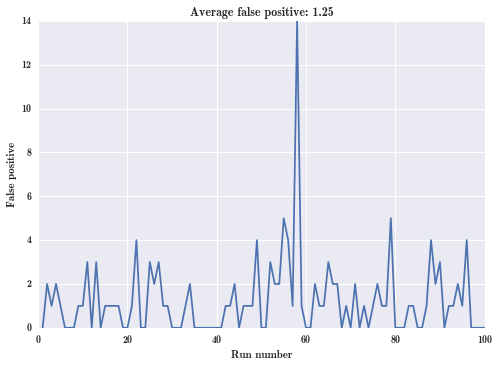

In [19]:
#running the sampling and post sampling methods for 100 iterations to get false positive
#num of active points: 5000
data = loadtxt("files/stats_5000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,1])
plt.xlabel('Run number')
plt.ylabel('False positive')
plt.title('Average false positive: ' + str(mean(data[:,1])))
plt.legend()
plt.show()

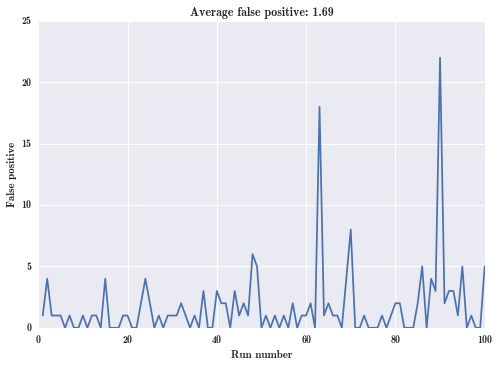

In [20]:
#running the sampling and post sampling methods for 100 iterations to get false positive
#num of active points: 10000
data = loadtxt("files/stats_10000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,1])
plt.xlabel('Run number')
plt.ylabel('False positive')
plt.title('Average false positive: ' + str(mean(data[:,1])))
plt.legend()
plt.show()

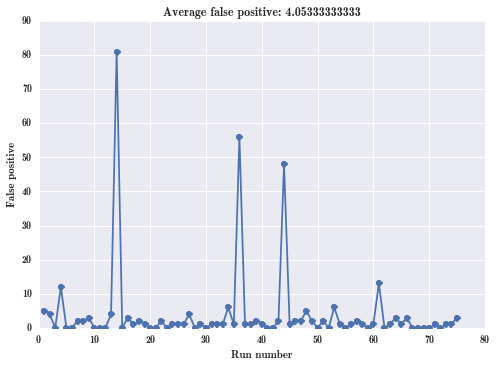

In [21]:
#running the sampling and post sampling methods for 100 iterations to get false positive
#num of active points: 15000
data = loadtxt("files/stats_15000.txt")
i = linspace(1, 75, 75)
plt.plot(i, data[:,1], marker='o')
plt.xlabel('Run number')
plt.ylabel('False positive')
plt.title('Average false positive: ' + str(mean(data[:,1])))
plt.legend()
plt.show()

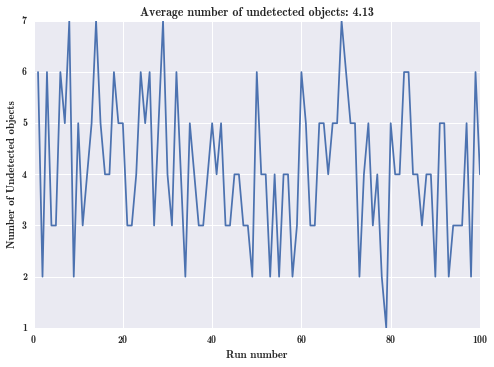

In [22]:
#running the sampling and post sampling methods for 100 iterations to get undetected objects
#num of active points: 5000
data = loadtxt("files/stats_5000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,2])
plt.xlabel('Run number')
plt.ylabel('Number of Undetected objects')
plt.title('Average number of undetected objects: ' + str(mean(data[:,2])))
plt.legend()
plt.show()

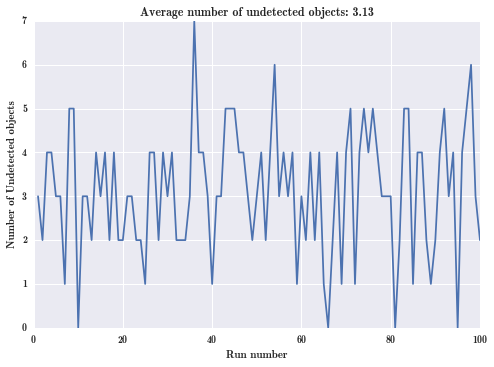

In [23]:
#running the sampling and post sampling methods for 100 iterations to get undetected objects
#num of active points: 10000
data = loadtxt("files/stats_10000.txt")
i = linspace(1, 100, 100)
plt.plot(i, data[:,2])
plt.xlabel('Run number')
plt.ylabel('Number of Undetected objects')
plt.title('Average number of undetected objects: ' + str(mean(data[:,2])))
plt.legend()
plt.show()

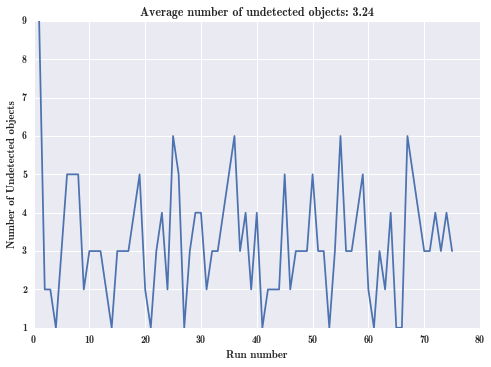

In [24]:
#running the sampling and post sampling methods for 100 iterations to get undetected objects
#num of active points: 15000
data = loadtxt("files/stats_15000.txt")
i = linspace(1, 75, 75)
plt.plot(i, data[:,2])
plt.xlabel('Run number')
plt.ylabel('Number of Undetected objects')
plt.title('Average number of undetected objects: ' + str(mean(data[:,2])))
plt.legend()
plt.show()

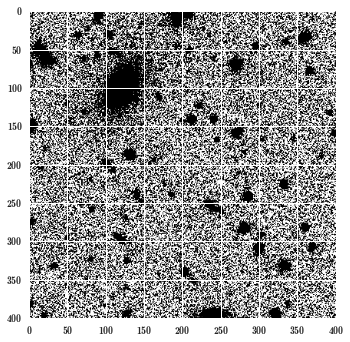

In [4]:
import pyfits as pf
H=pf.open('files/original_images/test3_i.fits')
Image=H[0].data
plt.imshow(Image, vmin=0, vmax=Image.max()*0.001) 
plt.show()

In [ ]:
import test_original as oi
prefix = 'original_images'
oi.run(Image, prefix)

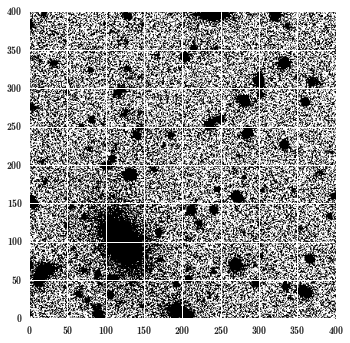

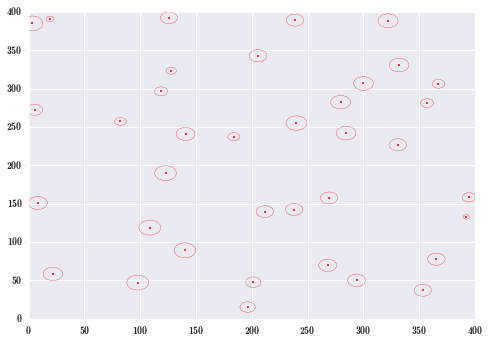

In [7]:
plt.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
plt.show()
prefix = 'original_images'
fileout="files"+"/"+str(prefix)+"/"+'config'+'_'+str(prefix)+'.ini'
ps.run(fileout)

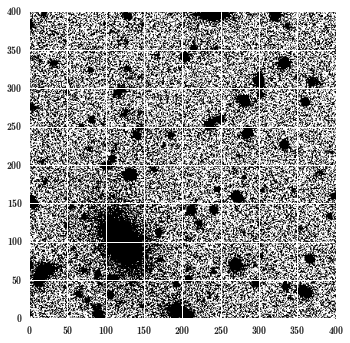

In [5]:
import pyfits as pf
Hi = pf.open('files/original_images/test3_i.fits')
Imagei = Hi[0].data
Hg = pf.open('files/original_images/test3_g.fits')
Imageg = Hg[0].data
Hr = pf.open('files/original_images/test3_r.fits')
Imager = Hr[0].data
HY = pf.open('files/original_images/test3_Y.fits')
ImageY = HY[0].data
Hz=pf.open('files/original_images/test3_z.fits')
Imagez = Hz[0].data
Image = Imagei + Imageg + Imager + ImageY + Imagez
plt.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
plt.show()

In [7]:
import test_original as oi
prefix = 'original_images_all_bands'
oi.run(Image, prefix)

400
done with active
38500
124525 Log evaluations
wrote to file: files/original_images_all_bands/original_images_all_bands_processed_detected.txt
wrote to file: files/original_images_all_bands/original_images_all_bands_all_detected.txt
1286.315377 seconds


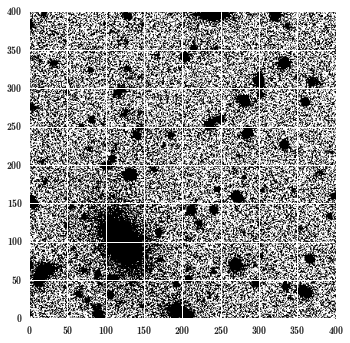

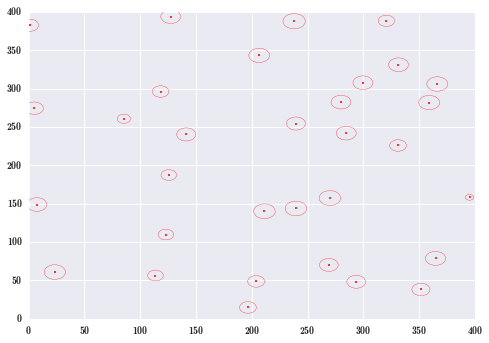

In [6]:
plt.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
plt.show()
prefix = 'original_images_all_bands'
fileout="files"+"/"+str(prefix)+"/"+'config'+'_'+str(prefix)+'.ini'
ps.run(fileout)

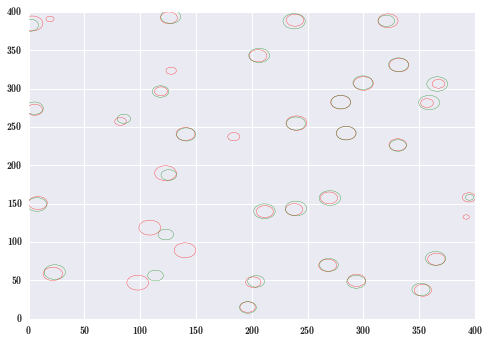

In [24]:
import matplotlib.pyplot as plt
prefix = 'original_images'
X,Y,A,R,L = loadtxt("files"+"/"+str(prefix)+"/"+str(prefix)+"_finalData.txt", unpack=True)
for i in range(len(X)):
        circle =  plt.Circle((X[i],Y[i]),R[i],edgecolor = 'r',facecolor='none')
        fig = plt.gcf()
        fig.gca().add_artist(circle)

prefix = 'original_images_all_bands'
X1,Y1,A1,R1,L1 = loadtxt("files"+"/"+str(prefix)+"/"+str(prefix)+"_finalData.txt", unpack=True)
plt.plot(X1, Y1, 'o', markerfacecolor="g", markersize=0.0001)
for i in range(len(X1)):
        circle =  plt.Circle((X1[i],Y1[i]),R1[i],edgecolor = 'g',facecolor='none')
        fig = plt.gcf()
        fig.gca().add_artist(circle)

400
done with active
40000
132783 Log evaluations
wrote to file: files/all_bands_g/all_bands_g_processed_detected.txt
wrote to file: files/all_bands_g/all_bands_g_all_detected.txt


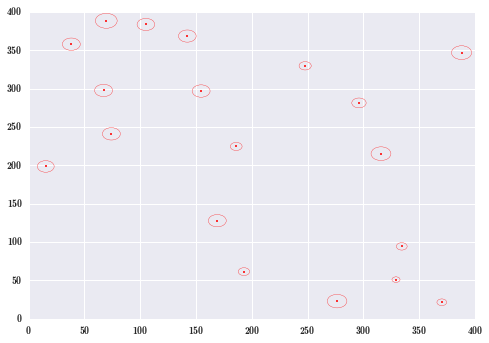

1174.58932781 seconds
400
done with active
37500
124939 Log evaluations
wrote to file: files/all_bands_i/all_bands_i_processed_detected.txt
wrote to file: files/all_bands_i/all_bands_i_all_detected.txt


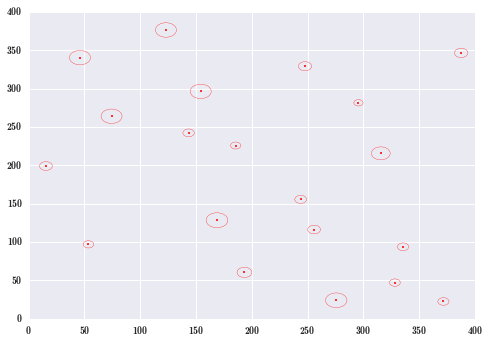

1067.23126101 seconds
400
done with active
38500
128962 Log evaluations
wrote to file: files/all_bands_r/all_bands_r_processed_detected.txt
wrote to file: files/all_bands_r/all_bands_r_all_detected.txt


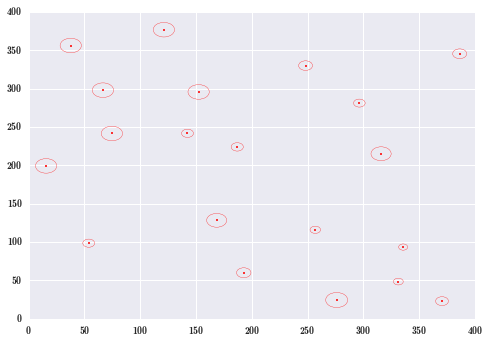

1101.33782792 seconds
400
done with active
36000
121536 Log evaluations
wrote to file: files/all_bands_Y/all_bands_Y_processed_detected.txt
wrote to file: files/all_bands_Y/all_bands_Y_all_detected.txt


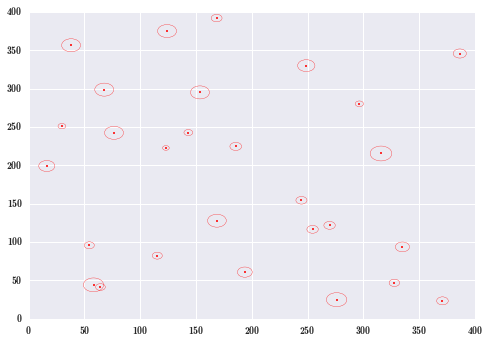

1030.41401196 seconds
400
done with active
38500
129517 Log evaluations
wrote to file: files/all_bands_z/all_bands_z_processed_detected.txt
wrote to file: files/all_bands_z/all_bands_z_all_detected.txt


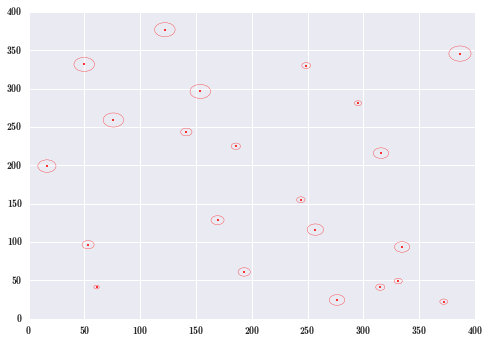

1113.76498199 seconds


In [4]:
import all_bands as ab
ab.run('g')
ab.run('i')
ab.run('r')
ab.run('Y')
ab.run('z')

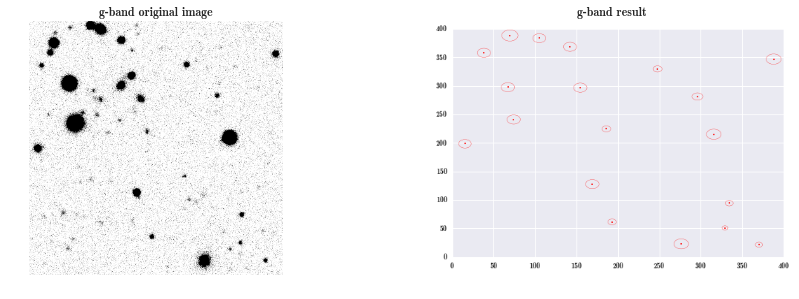

In [26]:
import pyfits as pf

fig=plt.figure(1,figsize=(15,10), dpi=100)
ax1=fig.add_subplot(2,2,1)

H=pf.open('test_images/test4_g.fits')
Image=H[0].data
ax1.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
ax1.axis("off")
ax1.set_title('g-band original image')

ax2=fig.add_subplot(2,2,2)
ax2.axis("off")
img=mpimg.imread('files/all_bands_g/clusters_active_points.png')
ax2.imshow(img)
ax2.set_title('g-band result')

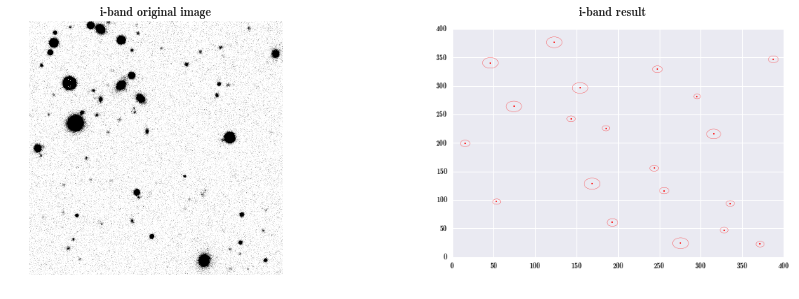

In [25]:
import pyfits as pf

fig=plt.figure(1,figsize=(15,10), dpi=100)
ax1=fig.add_subplot(2,2,1)

H=pf.open('test_images/test4_i.fits')
Image=H[0].data
ax1.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
ax1.axis("off")
ax1.set_title('i-band original image')

ax2=fig.add_subplot(2,2,2)
ax2.axis("off")
img=mpimg.imread('files/all_bands_i/clusters_active_points.png')
ax2.imshow(img)
ax2.set_title('i-band result')

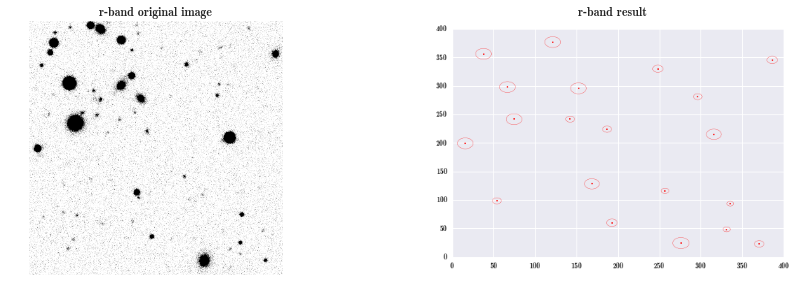

In [24]:
import pyfits as pf

fig=plt.figure(1,figsize=(15,10), dpi=100)
ax1=fig.add_subplot(2,2,1)

H=pf.open('test_images/test4_r.fits')
Image=H[0].data
ax1.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
ax1.axis("off")
ax1.set_title('r-band original image')

ax2=fig.add_subplot(2,2,2)
ax2.axis("off")
img=mpimg.imread('files/all_bands_r/clusters_active_points.png')
ax2.imshow(img)
ax2.set_title('r-band result')

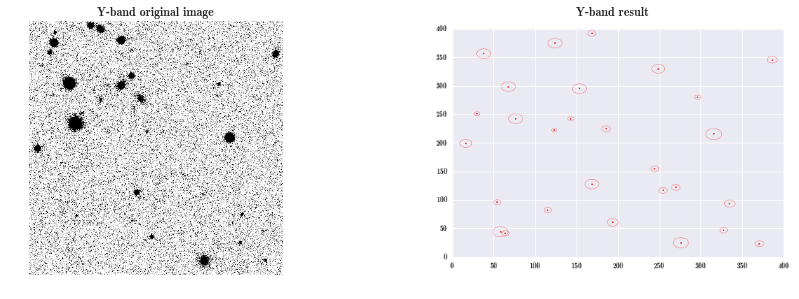

In [23]:
import pyfits as pf

fig=plt.figure(1,figsize=(15,10), dpi=100)
ax1=fig.add_subplot(2,2,1)

H=pf.open('test_images/test4_Y.fits')
Image=H[0].data
ax1.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
ax1.axis("off")
ax1.set_title('Y-band original image')

ax2=fig.add_subplot(2,2,2)
ax2.axis("off")
img=mpimg.imread('files/all_bands_Y/clusters_active_points.png')
ax2.imshow(img)
ax2.set_title('Y-band result')

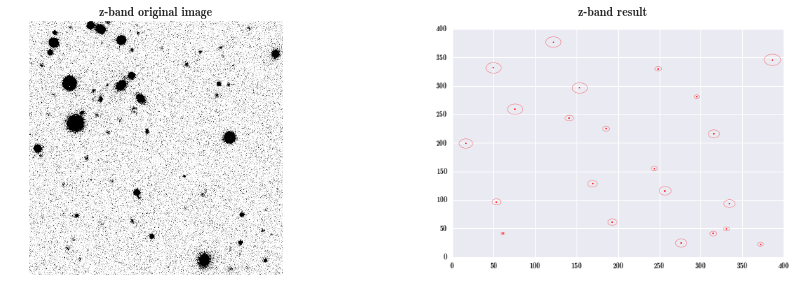

In [22]:
import pyfits as pf

fig=plt.figure(1,figsize=(15,10), dpi=100)
ax1=fig.add_subplot(2,2,1)

H=pf.open('test_images/test4_z.fits')
Image=H[0].data
ax1.imshow(Image, vmin=0, vmax=Image.max()*0.001, origin='lower') 
ax1.axis("off")
ax1.set_title('z-band original image')

ax2=fig.add_subplot(2,2,2)
ax2.axis("off")
img=mpimg.imread('files/all_bands_z/clusters_active_points.png')
ax2.imshow(img)
ax2.set_title('z-band result')

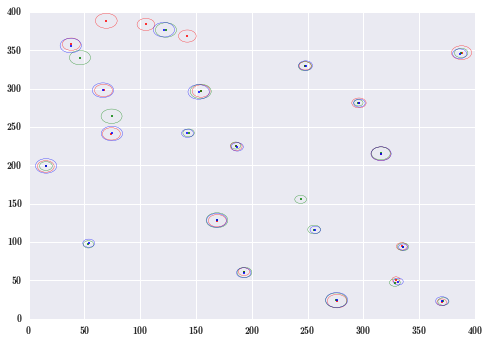

In [31]:
import matplotlib.pyplot as plt
prefix = 'all_bands_g'
X,Y,A,R,L = loadtxt("files"+"/"+str(prefix)+"/"+str(prefix)+"_finalData.txt", unpack=True)
plt.plot(X, Y, 'o', markerfacecolor="r", markersize=2)
for i in range(len(X)):
        circle =  plt.Circle((X[i],Y[i]),R[i],edgecolor = 'r',facecolor='none')
        fig = plt.gcf()
        fig.gca().add_artist(circle)

prefix = 'all_bands_i'
X,Y,A,R,L = loadtxt("files"+"/"+str(prefix)+"/"+str(prefix)+"_finalData.txt", unpack=True)
plt.plot(X, Y, 'o', markerfacecolor="g", markersize=2)
for i in range(len(X)):
        circle =  plt.Circle((X[i],Y[i]),R[i],edgecolor = 'g',facecolor='none')
        fig = plt.gcf()
        fig.gca().add_artist(circle)

prefix = 'all_bands_r'
X,Y,A,R,L = loadtxt("files"+"/"+str(prefix)+"/"+str(prefix)+"_finalData.txt", unpack=True)
plt.plot(X, Y, 'o', markerfacecolor="b", markersize=2)
for i in range(len(X)):
        circle =  plt.Circle((X[i],Y[i]),R[i],edgecolor = 'b',facecolor='none')
        fig = plt.gcf()
        fig.gca().add_artist(circle)



In [39]:
import numpy as np
X,Y,A,R,L = loadtxt("files"+"/"+str(prefix)+"/"+str(prefix)+"_finalData.txt", unpack=True)
a = zeros((len(X),5))
a[:,0] = X
a[:,1] = Y
a[:,2] = A
a[:,3] = R
a[:,4] = L
a.view('i8,i8,i8,i8,i8').sort(order=['f1'], axis=0)


[[  3.70512775e+02   2.30357800e+01   6.07861600e+00   5.78191500e+00
   -1.70623894e+09]
 [  2.76120643e+02   2.44750910e+01   1.02212950e+01   9.83772800e+00
   -1.70619575e+09]
 [  3.31365240e+02   4.85103120e+01   9.52611600e+00   4.39449600e+00
   -1.70623900e+09]
 [  1.92846684e+02   6.00300820e+01   9.09769700e+00   6.47200100e+00
   -1.70623693e+09]
 [  3.35674046e+02   9.35071990e+01   9.61336800e+00   4.06877000e+00
   -1.70623721e+09]
 [  5.39569760e+01   9.85744340e+01   8.67698400e+00   5.32116600e+00
   -1.70623950e+09]
 [  2.56962063e+02   1.16017224e+02   6.63559600e+00   4.70949800e+00
   -1.70623991e+09]
 [  1.68597095e+02   1.28385055e+02   1.07616620e+01   8.98273500e+00
   -1.70619780e+09]
 [  1.57688920e+01   1.99325719e+02   1.00181660e+01   9.48824500e+00
   -1.70622069e+09]
 [  3.15893871e+02   2.15110647e+02   1.13827590e+01   9.03289800e+00
   -1.70470016e+09]
 [  1.87010813e+02   2.24074364e+02   5.65406600e+00   5.46948100e+00
   -1.70623927e+09]
 [  7.4693